In [2]:
from scipy.io import loadmat
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
train_m = loadmat("train_32x32.mat")
test_m = loadmat("test_32x32.mat")

## EDA 

In [4]:
train_m.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [5]:
train_m["X"].shape

(32, 32, 3, 73257)

In [6]:
train_m["X"][:,:,:,0].shape

(32, 32, 3)

In [7]:
train_m["X"][:,:,:,0]

array([[[ 33,  30,  38],
        [ 15,  23,  19],
        [ 15,  17,  19],
        ...,
        [ 72,  65,  56],
        [ 82,  77,  57],
        [ 89,  79,  59]],

       [[ 28,  39,  35],
        [ 14,  25,  22],
        [ 14,  20,  17],
        ...,
        [ 40,  39,  50],
        [ 67,  58,  52],
        [ 83,  78,  60]],

       [[ 40,  41,  38],
        [ 18,  21,  26],
        [ 16,  17,  23],
        ...,
        [ 23,  29,  45],
        [ 35,  42,  44],
        [ 72,  69,  53]],

       ...,

       [[ 86,  81,  75],
        [ 87,  82,  71],
        [ 82,  79,  65],
        ...,
        [104, 104,  87],
        [104, 105,  81],
        [103, 105,  78]],

       [[ 84,  86,  64],
        [ 86,  79,  72],
        [ 82,  76,  72],
        ...,
        [110, 103,  84],
        [106, 105,  85],
        [106, 104,  86]],

       [[ 85,  88,  68],
        [ 89,  82,  72],
        [ 85,  79,  67],
        ...,
        [111, 104,  87],
        [109, 105,  86],
        [103, 106,  79]]

In [8]:
train_m["X"][:,:,:,0].flatten()

array([ 33,  30,  38, ..., 103, 106,  79], dtype=uint8)

In [9]:
train_m["X"][:,:,:,0].flatten().shape

(3072,)

In [10]:
train_m["y"].shape

(73257, 1)

In [11]:
train_m["y"][0][0]

1

Train set

In [12]:
from tqdm import tqdm
train_m_all_list=[]
for i in tqdm(range(train_m["X"].shape[-1])):
    train_m_temp_list=[]
    train_m_temp_list.extend(train_m["X"][:,:,:,i].flatten().tolist())
    train_m_temp_list.append(train_m["y"][i][0])
    train_m_all_list.append(train_m_temp_list) 

100%|█████████████████████████████████████████████████████████████████████████| 73257/73257 [00:06<00:00, 11972.24it/s]


In [13]:
train_m_d=pd.DataFrame(train_m_all_list)
train_m_X=train_m_d.iloc[:,:-1]
train_m_Y=train_m_d.iloc[:,-1]

Test set

In [14]:
from tqdm import tqdm
test_m_all_list=[]
for i in tqdm(range(test_m["X"].shape[-1])):
    test_m_temp_list=[]
    test_m_temp_list.extend(test_m["X"][:,:,:,i].flatten().tolist())
    test_m_temp_list.append(test_m["y"][i][0])
    test_m_all_list.append(test_m_temp_list) 

100%|██████████████████████████████████████████████████████████████████████████| 26032/26032 [00:04<00:00, 5726.35it/s]


In [15]:
test_m_d=pd.DataFrame(test_m_all_list)
test_m_X=test_m_d.iloc[:,:-1]
test_m_Y=test_m_d.iloc[:,-1]

## PCA - Dimensionality reduction

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=train_m_X.shape[1])
pca.fit(train_m_X)
pca.explained_variance_ratio_

array([5.79135078e-01, 5.71083324e-02, 5.28111028e-02, ...,
       1.04870001e-08, 1.03815449e-08, 1.02761637e-08])

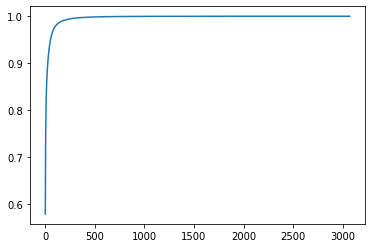

In [17]:
plt.plot([i for i in range(train_m_X.shape[1])], 
         [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(train_m_X.shape[1])])
plt.show()

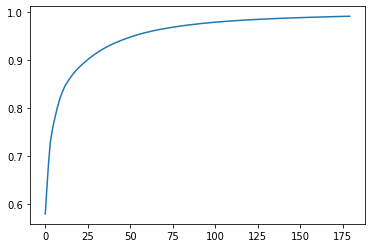

In [18]:
plt.plot([i for i in range(180)], 
         [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(180)])
plt.show()

After PCA dimensionality reduction, the first 173 features can represent 99% of the original features

In [19]:
pca = PCA(0.99)
pca.fit(train_m_X)

PCA(n_components=0.99)

In [20]:
pca.n_components_

173

In [21]:
X_train_reduction = pca.transform(train_m_X)
X_test_reduction = pca.transform(test_m_X)

In [22]:
pca.explained_variance_ratio_

array([5.79135078e-01, 5.71083324e-02, 5.28111028e-02, 4.05149288e-02,
       2.16610152e-02, 1.79112524e-02, 1.54399372e-02, 1.48749461e-02,
       1.24604510e-02, 1.13839279e-02, 9.17139001e-03, 8.46562567e-03,
       7.23915234e-03, 5.51354094e-03, 5.30215310e-03, 5.15200753e-03,
       4.85522245e-03, 4.22639669e-03, 4.09748355e-03, 3.74960889e-03,
       3.61843325e-03, 3.43489496e-03, 3.26767501e-03, 3.13966192e-03,
       3.05161486e-03, 2.99049417e-03, 2.79309986e-03, 2.73722500e-03,
       2.59571641e-03, 2.49628315e-03, 2.48187253e-03, 2.32670850e-03,
       2.29770826e-03, 2.18953351e-03, 2.09735599e-03, 2.02725310e-03,
       1.92138115e-03, 1.82310793e-03, 1.80881391e-03, 1.74304268e-03,
       1.63904455e-03, 1.56306365e-03, 1.51462192e-03, 1.45761298e-03,
       1.43825724e-03, 1.40642214e-03, 1.34370342e-03, 1.29928717e-03,
       1.28424631e-03, 1.22277174e-03, 1.19186838e-03, 1.15555026e-03,
       1.13644761e-03, 1.11720945e-03, 1.07699209e-03, 1.04010159e-03,
      

### Splice data

In [23]:
r_train=pd.concat([pd.DataFrame(X_train_reduction),train_m_Y],axis=1)
r_test=pd.concat([pd.DataFrame(X_test_reduction),test_m_Y],axis=1)

In [25]:
r_test.to_excel('test.xlsx',index=False)

In [26]:
r_train.to_excel('train.xlsx',index=False)

In [27]:
pd.concat([r_train,r_test]).to_excel('all.xlsx',index=False)

## K-means

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
# KMEANS
from sklearn.cluster import KMeans


import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# plt.rcParams['font.sans-serif'] = ['Simhei'] # 解决中文乱码问题

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,roc_curve,auc
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
# plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # Used to display negative signs normally

In [29]:
data=pd.read_excel('all.xlsx',engine='openpyxl')
data.columns

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
             164,  165,  166,  167,  168,  169,  170,  171,  172, 3072],
           dtype='int64', length=174)

In [30]:
X= data.iloc[:,:-1]
X

,0,1,2,3,4,5,6,7,8,9,...,163,164,165,166,167,168,169,170,171,172
0,-2851.858761,-304.061873,-340.748617,668.006462,178.635945,-41.798238,-346.555209,260.758974,343.448610,112.341342,...,28.678276,30.036569,0.729528,79.898416,-22.877072,-23.642219,-20.523945,30.151965,8.309358,4.543244
1,-2317.106462,-454.449011,-567.618848,6.584655,317.022047,-134.562829,166.939488,427.260226,247.479877,3.658681,...,-32.886407,-8.514051,-9.779188,28.143974,4.326326,-11.612572,-1.443318,-27.926972,4.631340,-20.475873
2,3857.528875,-443.666525,2121.711265,832.077859,-780.683531,442.270188,-399.976415,514.146432,-318.817534,-317.002105,...,34.580255,-54.595747,-158.709631,-76.211717,-65.982751,121.719799,14.276475,4.656656,-87.703754,-30.781459
3,4029.986805,219.811067,2093.292382,1086.874668,-941.390123,-605.202236,631.662437,787.980782,195.635132,-254.069686,...,-68.943241,20.698554,53.818845,-11.281782,85.409639,-82.113926,-18.733129,-99.934563,15.863903,31.619434
4,1048.891077,131.629897,-71.759900,-49.915412,-398.017308,71.365023,-1.345810,235.720548,-4.625660,108.279085,...,5.960245,4.799534,-11.680845,-9.478277,-10.991890,7.959289,-3.390314,-12.741386,6.933219,-7.605156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99284,1225.081474,657.701993,-390.356828,-228.069657,-319.591955,-36.141095,-518.321793,-66.644583,164.972741,40.139040,...,15.639724,-13.155175,21.198770,-11.661338,-0.387362,13.665022,-11.319082,-13.655178,-1.563318,10.135581
99285,678.839742,-409.318337,-288.315964,-62.823868,-339.891678,-212.396679,-298.371778,-272.791083,330.225880,13.902463,...,9.458072,1.989068,10.721220,6.833171,4.094894,-1.791231,0.485067,46.034737,40.260028,2.239314
99286,905.148953,-550.495925,77.914580,-187.960272,-181.672773,-15.582664,-387.138491,-207.221101,308.969919,141.712214,...,-13.439240,8.855137,-15.362130,-8.504079,10.012256,4.365058,-8.000759,9.730506,-2.090009,-18.688176
99287,-1307.011738,-603.111015,128.514794,283.266663,1125.207713,293.867816,-469.125432,227.589647,83.407235,226.486146,...,-16.712212,8.944125,-24.155447,-31.414160,9.295424,-6.921672,19.099620,10.662231,2.087087,-7.632571


### Calculation of silhouette coefficients (calculation is slow)

In [31]:
from tqdm import tqdm
scores = []
for k in tqdm(range(2, 15)):
    labels = KMeans(n_clusters=k).fit(X).labels_
    score = metrics.silhouette_score(X, labels)
    scores.append(score)

scores

100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [42:37<00:00, 196.76s/it]


[0.33086755311241367,
 0.2219473599504797,
 0.16315473032187733,
 0.123965775394484,
 0.11354602945386724,
 0.10902414907620375,
 0.09110500985915584,
 0.08801829389701456,
 0.08370857044402961,
 0.08117110796440871,
 0.07150599726095788,
 0.07097370088548602,
 0.06966168125603703]

Text(0.5, 0, 'Number of Clusters Initialized')

Text(0, 0.5, 'Sihouette Score')

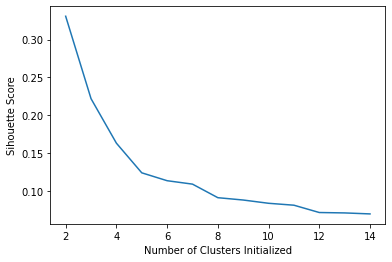

In [32]:
plt.plot(list(range(2, 15)), scores)
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette Score")

### Compute calinski harabasz (computes fast)

In [33]:
from tqdm import tqdm
scores = []
for k in tqdm(range(2, 15)):
    labels = KMeans(n_clusters=k).fit(X).labels_
    score = metrics.calinski_harabasz_score(X, labels)
    scores.append(score)

scores

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [06:27<00:00, 29.83s/it]


[67020.75760126013,
 50215.01689646231,
 39606.71498335314,
 32305.60783401418,
 27167.229308480997,
 23693.205464206134,
 21155.107247027863,
 19162.60200462744,
 17516.731185357035,
 16165.899563232526,
 15023.224135403192,
 14043.94302233953,
 13208.675860639445]

Text(0.5, 0, 'Number of Clusters Initialized')

Text(0, 0.5, 'calinski harabasz Score')

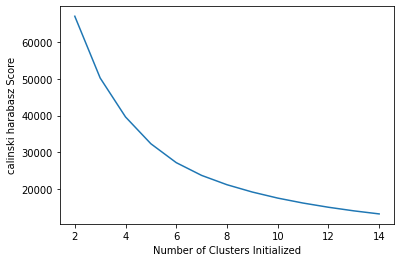

In [34]:
plt.plot(list(range(2, 15)), scores)
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("calinski harabasz Score")

### Cluster

In [35]:
best_k=10 # # Divide into 10 clusters
km = KMeans(n_clusters=best_k).fit(X)

In [36]:
km.labels_

array([4, 9, 3, ..., 8, 9, 9])

In [37]:
# The result after clustering, from 0-9, let each add one
pre_label_v=[i+1for i in km.labels_]
set(pre_label_v)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [43]:
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,3072,pre_label
0,-2851.858761,-304.061873,-340.748617,668.006462,178.635945,-41.798238,-346.555209,260.758974,343.448610,112.341342,...,0.729528,79.898416,-22.877072,-23.642219,-20.523945,30.151965,8.309358,4.543244,1,5
1,-2317.106462,-454.449011,-567.618848,6.584655,317.022047,-134.562829,166.939488,427.260226,247.479877,3.658681,...,-9.779188,28.143974,4.326326,-11.612572,-1.443318,-27.926972,4.631340,-20.475873,9,10
2,3857.528875,-443.666525,2121.711265,832.077859,-780.683531,442.270188,-399.976415,514.146432,-318.817534,-317.002105,...,-158.709631,-76.211717,-65.982751,121.719799,14.276475,4.656656,-87.703754,-30.781459,2,4
3,4029.986805,219.811067,2093.292382,1086.874668,-941.390123,-605.202236,631.662437,787.980782,195.635132,-254.069686,...,53.818845,-11.281782,85.409639,-82.113926,-18.733129,-99.934563,15.863903,31.619434,3,4
4,1048.891077,131.629897,-71.759900,-49.915412,-398.017308,71.365023,-1.345810,235.720548,-4.625660,108.279085,...,-11.680845,-9.478277,-10.991890,7.959289,-3.390314,-12.741386,6.933219,-7.605156,2,9
5,700.503386,236.544887,-111.944059,234.402513,-396.257591,116.213291,170.673409,152.835731,202.936186,-69.595374,...,18.084632,5.756049,-9.836750,6.988893,-2.143060,-5.000776,0.217559,-5.462034,5,3
6,-855.806805,-819.929193,348.167508,337.319034,266.415151,366.591988,-56.152764,-181.539528,111.258056,162.553389,...,12.320702,53.548006,49.307402,25.262458,-12.611577,38.656424,46.020197,-41.917249,9,8
7,-812.117211,823.242436,188.669875,-37.204776,-165.858298,98.395347,-66.329526,-458.889172,73.557585,165.311854,...,-14.038727,-2.676025,-27.438478,-44.577482,40.378578,19.499011,20.785560,39.877419,3,8
8,-1654.857886,-529.178767,14.780570,693.423631,-176.382596,472.601824,92.512493,763.722277,277.795701,-66.574479,...,-0.644050,-19.399426,-19.787389,-12.477166,-1.092322,-22.661808,-11.213592,-1.313609,3,10
9,-1975.408812,1074.512077,276.290336,862.326593,57.604241,88.697242,-16.114787,478.088866,262.428070,-98.695234,...,-6.371186,-2.003244,-32.655188,27.152532,34.408971,-4.846118,0.584466,-3.165911,1,2


In [47]:
data[3072].unique()# Its own label collection

array([ 1,  9,  2,  3,  5,  8,  7,  4,  6, 10], dtype=int64)

In [39]:
data["pre_label"] =pre_label_v

In [40]:
data.head(15)

,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,3072,pre_label
0,-2851.858761,-304.061873,-340.748617,668.006462,178.635945,-41.798238,-346.555209,260.758974,343.448610,112.341342,...,0.729528,79.898416,-22.877072,-23.642219,-20.523945,30.151965,8.309358,4.543244,1,5
1,-2317.106462,-454.449011,-567.618848,6.584655,317.022047,-134.562829,166.939488,427.260226,247.479877,3.658681,...,-9.779188,28.143974,4.326326,-11.612572,-1.443318,-27.926972,4.631340,-20.475873,9,10
2,3857.528875,-443.666525,2121.711265,832.077859,-780.683531,442.270188,-399.976415,514.146432,-318.817534,-317.002105,...,-158.709631,-76.211717,-65.982751,121.719799,14.276475,4.656656,-87.703754,-30.781459,2,4
3,4029.986805,219.811067,2093.292382,1086.874668,-941.390123,-605.202236,631.662437,787.980782,195.635132,-254.069686,...,53.818845,-11.281782,85.409639,-82.113926,-18.733129,-99.934563,15.863903,31.619434,3,4
4,1048.891077,131.629897,-71.759900,-49.915412,-398.017308,71.365023,-1.345810,235.720548,-4.625660,108.279085,...,-11.680845,-9.478277,-10.991890,7.959289,-3.390314,-12.741386,6.933219,-7.605156,2,9
5,700.503386,236.544887,-111.944059,234.402513,-396.257591,116.213291,170.673409,152.835731,202.936186,-69.595374,...,18.084632,5.756049,-9.836750,6.988893,-2.143060,-5.000776,0.217559,-5.462034,5,3
6,-855.806805,-819.929193,348.167508,337.319034,266.415151,366.591988,-56.152764,-181.539528,111.258056,162.553389,...,12.320702,53.548006,49.307402,25.262458,-12.611577,38.656424,46.020197,-41.917249,9,8
7,-812.117211,823.242436,188.669875,-37.204776,-165.858298,98.395347,-66.329526,-458.889172,73.557585,165.311854,...,-14.038727,-2.676025,-27.438478,-44.577482,40.378578,19.499011,20.785560,39.877419,3,8
8,-1654.857886,-529.178767,14.780570,693.423631,-176.382596,472.601824,92.512493,763.722277,277.795701,-66.574479,...,-0.644050,-19.399426,-19.787389,-12.477166,-1.092322,-22.661808,-11.213592,-1.313609,3,10
9,-1975.408812,1074.512077,276.290336,862.326593,57.604241,88.697242,-16.114787,478.088866,262.428070,-98.695234,...,-6.371186,-2.003244,-32.655188,27.152532,34.408971,-4.846118,0.584466,-3.165911,1,2


In [48]:
y_true=data[3072].values.tolist() 
y_pred=data["pre_label"].values.tolist() 

### Evaluation index

In [49]:
print(classification_report(y_true,y_pred))
print('Accuracy on the test set:%.2f'% accuracy_score(y_true,y_pred))

              precision    recall  f1-score   support

           1       0.14      0.04      0.06     18960
           2       0.15      0.12      0.13     14734
           3       0.12      0.15      0.13     11379
           4       0.10      0.10      0.10      9981
           5       0.09      0.11      0.10      9266
           6       0.08      0.06      0.07      7704
           7       0.06      0.03      0.04      7614
           8       0.06      0.09      0.08      6705
           9       0.07      0.14      0.09      6254
          10       0.07      0.14      0.09      6692

    accuracy                           0.09     99289
   macro avg       0.09      0.10      0.09     99289
weighted avg       0.10      0.09      0.09     99289

Accuracy on the test set:0.09


<AxesSubplot:>

Text(69.0, 0.5, 'Actual results')

Text(0.5, 51.0, 'Prediction results')

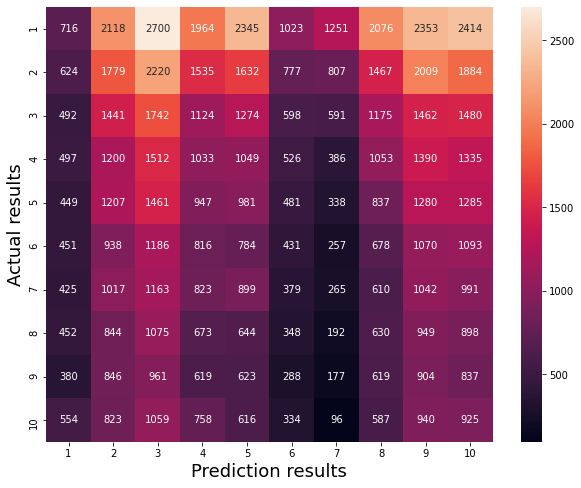

In [53]:
# confusion matrix
conf_mat = confusion_matrix(y_true,y_pred)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=list(set(data[3072].values.tolist())), yticklabels=list(set(data[3072].values.tolist())))
plt.ylabel('Actual results',fontsize=18)
plt.xlabel('Prediction results',fontsize=18)
# plt.savefig('fenlei11.jpg')

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_reduction = pca.transform(X)
X_reduction 

PCA(n_components=2)

array([[-2872.40782318,   244.43953366],
       [-2324.31967481,   434.15138265],
       [ 3776.18407164,   460.88519192],
       ...,
       [  884.28551219,   550.05004812],
       [-1349.63436579,   575.18907854],
       [-1584.65827714,  -576.27819061]])

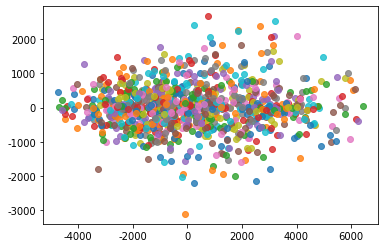

In [55]:
for i in range(1000):
    plt.scatter(X_reduction[i,0], X_reduction[i,1], alpha=0.8)
plt.show()

## KNN

In [57]:
train_data=pd.read_excel('train.xlsx',engine='openpyxl')
train_data

,0,1,2,3,4,5,6,7,8,9,...,164,165,166,167,168,169,170,171,172,3072
0,-2851.858761,-304.061873,-340.748617,668.006462,178.635945,-41.798238,-346.555209,260.758974,343.448610,112.341342,...,30.036569,0.729528,79.898416,-22.877072,-23.642219,-20.523945,30.151965,8.309358,4.543244,1
1,-2317.106462,-454.449011,-567.618848,6.584655,317.022047,-134.562829,166.939488,427.260226,247.479877,3.658681,...,-8.514051,-9.779188,28.143974,4.326326,-11.612572,-1.443318,-27.926972,4.631340,-20.475873,9
2,3857.528875,-443.666525,2121.711265,832.077859,-780.683531,442.270188,-399.976415,514.146432,-318.817534,-317.002105,...,-54.595747,-158.709631,-76.211717,-65.982751,121.719799,14.276475,4.656656,-87.703754,-30.781459,2
3,4029.986805,219.811067,2093.292382,1086.874668,-941.390123,-605.202236,631.662437,787.980782,195.635132,-254.069686,...,20.698554,53.818845,-11.281782,85.409639,-82.113926,-18.733129,-99.934563,15.863903,31.619434,3
4,1048.891077,131.629897,-71.759900,-49.915412,-398.017308,71.365023,-1.345810,235.720548,-4.625660,108.279085,...,4.799534,-11.680845,-9.478277,-10.991890,7.959289,-3.390314,-12.741386,6.933219,-7.605156,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73252,-2329.929921,-647.539128,1219.373415,695.623868,-177.066215,-163.865326,670.043481,439.869245,66.250954,-584.536435,...,41.643969,-40.063909,35.033431,-30.877816,-20.993151,10.741375,-18.223080,-9.160559,-74.471140,2
73253,-2286.170833,837.334976,1304.719447,427.956985,110.696252,-271.915848,497.325791,403.082721,445.553826,-399.758323,...,12.419804,-5.588642,-25.274975,-50.603516,10.455537,80.483422,5.584232,-29.258258,-15.356306,2
73254,4027.854882,-1328.233271,236.196656,1019.154326,172.719815,241.358121,-717.429941,32.393563,-522.921993,-787.642116,...,-30.646793,-36.059635,55.515403,19.608728,8.188069,16.756871,-4.110916,54.453689,32.059388,1
73255,5358.767743,-178.005523,237.036963,-532.316907,593.941623,155.960255,257.291443,-195.534859,108.128459,80.334960,...,0.589900,-9.429700,17.466663,0.354489,-33.487170,-40.774843,-20.523753,8.429811,36.785446,6


In [58]:
test_data=pd.read_excel('test.xlsx',engine='openpyxl')

In [59]:
X_train= train_data.iloc[:,:-1].values
y_train= train_data.iloc[:,-1].values
X_test= test_data.iloc[:,:-1].values
y_test= test_data.iloc[:,-1].values

In [60]:
from sklearn.neighbors import KNeighborsClassifier
kNN_classifier = KNeighborsClassifier()
kNN_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [61]:
pre_label=kNN_classifier.predict(X_test)
pre_label
# y_test

array([1, 2, 1, ..., 1, 6, 1], dtype=int64)

In [62]:
y_true=y_test.tolist() 
y_pred=pre_label.tolist()  
print(classification_report(y_true,y_pred))
print('Accuracy on the test set: %.2f'% accuracy_score(y_true,y_pred))

              precision    recall  f1-score   support

           1       0.44      0.84      0.58      5099
           2       0.54      0.53      0.53      4149
           3       0.40      0.30      0.34      2882
           4       0.55      0.57      0.56      2523
           5       0.47      0.28      0.35      2384
           6       0.43      0.32      0.37      1977
           7       0.61      0.35      0.45      2019
           8       0.35      0.23      0.28      1660
           9       0.41      0.28      0.33      1595
          10       0.50      0.37      0.43      1744

    accuracy                           0.47     26032
   macro avg       0.47      0.41      0.42     26032
weighted avg       0.47      0.47      0.45     26032

Accuracy on the test set: 0.47


<AxesSubplot:>

Text(69.0, 0.5, 'Actual results')

Text(0.5, 51.0, 'Prediction results')

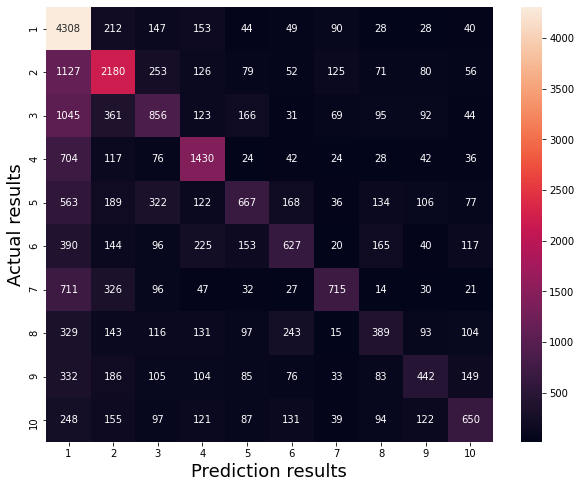

In [63]:
#CM
conf_mat = confusion_matrix(y_true,y_pred)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=list(set(test_data[3072].values.tolist())), yticklabels=list(set(test_data[3072].values.tolist())))
plt.ylabel('Actual results',fontsize=18)
plt.xlabel('Prediction results',fontsize=18)
# plt.savefig('fenlei11.jpg')

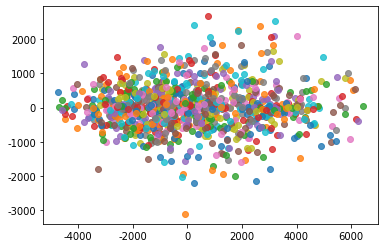

In [64]:
for i in range(1000):
    plt.scatter(X_reduction[i,0], X_reduction[i,1], alpha=0.8)
plt.show()

## K-means without dimensionality reduction (Multidimensional vectors are not supported)

Kmeans does not support matrices, only tabular data. This section is for reference only.

In [65]:
from scipy.io import loadmat
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [66]:
train_m = loadmat("train_32x32.mat")
test_m = loadmat("test_32x32.mat")

In [67]:
test_m["X"].shape

(32, 32, 3, 26032)

In [68]:
test_m["X"][:,:,:,0].shape

(32, 32, 3)

In [69]:
test_m["X"][:,:,:,0]

array([[[ 38, 103,  60],
        [ 39, 104,  61],
        [ 39, 104,  62],
        ...,
        [ 41, 102,  61],
        [ 42, 103,  62],
        [ 39,  97,  57]],

       [[ 39, 104,  61],
        [ 39, 104,  61],
        [ 39, 104,  62],
        ...,
        [ 41, 102,  61],
        [ 43, 101,  63],
        [ 39,  97,  57]],

       [[ 38, 105,  62],
        [ 37, 104,  61],
        [ 39, 106,  63],
        ...,
        [ 43, 101,  63],
        [ 43, 100,  64],
        [ 39,  97,  59]],

       ...,

       [[ 52, 119,  78],
        [ 53, 120,  79],
        [ 51, 118,  77],
        ...,
        [ 44, 118,  69],
        [ 44, 117,  71],
        [ 41, 114,  69]],

       [[ 50, 117,  76],
        [ 51, 118,  77],
        [ 49, 116,  75],
        ...,
        [ 44, 117,  71],
        [ 45, 116,  72],
        [ 42, 113,  69]],

       [[ 48, 115,  74],
        [ 48, 115,  74],
        [ 46, 113,  72],
        ...,
        [ 43, 116,  71],
        [ 44, 115,  71],
        [ 42, 113,  71]]

In [70]:
test_m["y"].shape

(26032, 1)

In [71]:
test_m["y"][0][0]

5

In [72]:
from tqdm import tqdm
X=[]
Y=[]
for i in tqdm(range(test_m["X"].shape[-1])):
    X.append(test_m["X"][:,:,:,i])
    Y.append(test_m["y"][i][0])

100%|████████████████████████████████████████████████████████████████████████| 26032/26032 [00:00<00:00, 145992.22it/s]


In [73]:
from tqdm import tqdm
scores = []
for k in tqdm(range(2, 15)):
    labels = KMeans(n_clusters=k).fit(X).labels_
    score = metrics.calinski_harabasz_score(X, labels)
    scores.append(score)

scores

  0%|                                                                                           | 0/13 [00:05<?, ?it/s]


ValueError: Found array with dim 4. Estimator expected <= 2.

The essence is still supervised learning, but when building the model, PCA (principal component analysis, dimensionality reduction) is used in the process of feature extraction to obtain the salient features after dimension reduction, and then the salient features extracted by PCA twice are combined with the final The features of the model data are fused (a bit of attention, which essentially makes the features of the model more focused and denoised), and the effect is improved by using the fused features.

1. Flattening the image data may lose important spatial features of the original image data
2. The parameter space of the image is very large. To put it bluntly, the definition domain of the parameters is very large. The clustering algorithm cannot find the general rules, and the clustering can get the desired clusters (the features are still not focused), although we use PCA dimensionality reduction, but there may be problems mentioned in 1, making the effect not good